# **Atividade Prática**
<font size=3>

- **Tema:** regressão linear e logística.
- **Prazo de entrega:** 09 de Setembro.

**Envie** a atividade pelo [formulário](https://docs.google.com/forms/d/e/1FAIpQLSfzuCXb-Y4TYbeFM6qNRcNwuW-ynsaBHof-59f39JigYjAvDA/viewform?usp=sharing&ouid=111377632325147218671).

---

## **Questão 1:**
<font size=3>

Resolva a tarefa de **regressão** do *dataset* [`fetch_california_housing`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) com o modelo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Siga o **fluxo de trabalho** de aprendizado de máquina, descrito na aula.

#### **Fluxo de trabalho em AM:**
<font size=3>
    
O desenvolvimento de um modelo em AM geralmente segue um **fluxo de etapas**:
1. **Importar e explorar os dados** — entender suas características, distribuições e possíveis problemas.
2. **Pré-processar os dados** — tratar valores ausentes, normalizar/transformar atributos e preparar as variáveis de entrada.
3. **Treinar o modelo** — escolha de um modelo e ajuste dos parâmetros internos a partir dos dados de treino.
4. **Realizar predições** — aplicar o modelo treinado em novos dados.
5. **Avaliar o desempenho** — medir acurácia, erro ou outras métricas adequadas ao problema.

In [62]:
# Importando biblotecas gerais
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [63]:
# Importando dados
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Importando tipos de métricas usados no modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
# Vendo como os os dados estão organizados
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [65]:
# Dividindo os dados entre teste e treinamento
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Definindo o modelo de regressão:
model = LinearRegression()

# Fitando os dados de treinamento:
model.fit(X_train, y_train)

# Previsão do modelo:
y_pred = model.predict(X_test)

In [67]:
# Avaliando o modelo (erro quadrarasdo médio)
mean = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Médio Quadrático:", f'{mean:.2f}')
print("R²:", f'{r2:.3f}')

Erro Médio Quadrático: 0.53
R²: 0.596


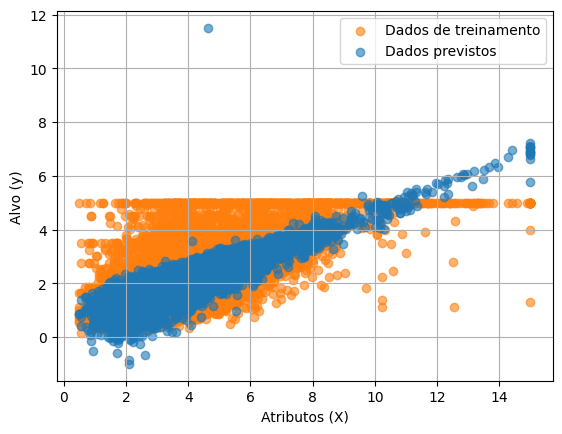

Coeficiente: 0.446
Intercepto: -37.056


In [68]:
plt.scatter(X_train[:, 0], y_train, color="tab:orange", alpha=0.6, label="Dados de treinamento")

plt.scatter(X_test[:, 0], y_pred, color="tab:blue", alpha=0.6, label="Dados previstos")

plt.xlabel("Atributos (X)")
plt.ylabel("Alvo (y)")
plt.legend()
plt.grid()
plt.show()

print(f"Coeficiente: {model.coef_[0]:.3f}")
print(f"Intercepto: {model.intercept_:.3f}")

## **Questão 2:**
<font size=3>

Resolva a tarefa de **classificação** do *dataset* [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) com o modelo [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Siga o **fluxo de trabalho** de aprendizado de máquina, descrito na aula.

In [69]:
# Importando bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [70]:
# Importando os dados do Iris
data = load_iris()

# Vendo como os os dados estão organizados
print(data.data.shape, data.target.shape)
print(data.feature_names)
print(data.target[[10, 25, 50]])
print(list(data.target_names))

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 1]
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [71]:
# Variaveis de input (X - petal length e petal width) e output (y)
X = data.data[:, [2, 3]]
y = data.target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [72]:
# Normalização (opcional segundo o material do professor para esse tipo de modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X-train:{X_train.shape}, y-train:{y_train.shape}")
print(f"X-test:{X_test.shape}, y-test:{y_test.shape}")

X-train:(105, 2), y-train:(105,)
X-test:(45, 2), y-test:(45,)


In [73]:
model = LogisticRegression(max_iter=2000) # número máximo de iteração para convergir

# Criando o modelo de Regressão Logistica
model = LogisticRegression(max_iter=200)

In [74]:
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no teste
y_pred = model.predict(X_test)

In [75]:
# Avaliando o model
acuracia = accuracy_score(y_test, y_pred)
print("\nAcurácia:", acuracia)


Acurácia: 1.0


In [76]:
from sklearn.preprocessing import StandardScaler

# Criando o scaler e ajustando apenas nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


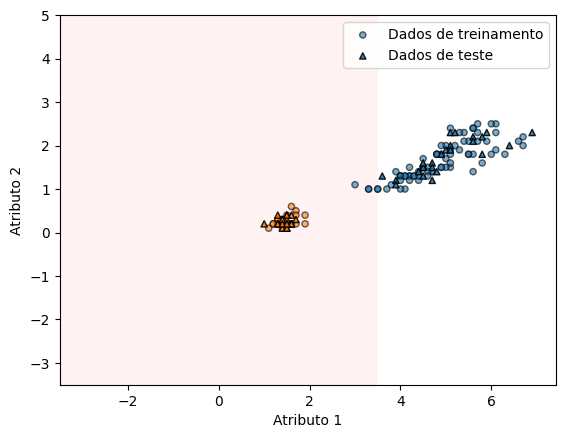

In [77]:
from matplotlib.colors import ListedColormap

# para visualizarmos a fronteira de classificação, iremos criar um grid (grade)
# com uma distribuição homogênea de pontos de ambos os atributos:

atrib1, atrib2 = np.meshgrid(np.linspace(-3.5, 3.5, 300),
                             np.linspace(-3.5, 5.0, 300))

grid = np.c_[atrib1.ravel(), atrib2.ravel()]

# normalizando o grid com a mesma média e desvio padrão que fitou os dados de treinamento:
grid = scaler.transform(grid)

# fazendo a predição do grid para visualizarmos a fronteira de classificação:
Z = model.predict(grid).reshape(atrib1.shape)


cmap_fundo = ListedColormap(["#FFCCCC", "#CCCCFF"])
cmap_pontos = ListedColormap(["tab:orange", "tab:blue"])

plt.contourf(atrib1, atrib2, Z, alpha=0.25, cmap=cmap_fundo)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_pontos,
            s=20, edgecolor="k", alpha=0.6, label="Dados de treinamento")

plt.scatter(X_test[:, 0],  X_test[:, 1], c=y_test, cmap=cmap_pontos,
            s=20, marker="^", edgecolor="k", alpha=0.9, label="Dados de teste")

plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend()
plt.show()